<a href="https://colab.research.google.com/github/isharhan/hello-world/blob/main/3Mars_Missions_Textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze The Sentiment of Tweets From Twitter Data and Tweepy in Python 
Ref: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/


In [1]:
pip install tweepy

In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

In [5]:
pip install nltk

In [6]:
pip install networkx

In [7]:
pip install textblob

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [9]:
consumer_key= 'aKAvYeraEMQNHbzVG22rz3uMH'
consumer_secret= 'G5I0UZmi9TTadbQPppIwbYTPTIqAj6tkjswbOHmEddYZAaXpxt'
access_token= '1850387936-ZPLc7EWyknMNUivIokQV3KO8ZTRiXrRcPEuOfOr'
access_token_secret= 'PlIKokmRHHs8SPkmrZrthsDV6ZvCFdiE2DthySmA2luO7'

In [10]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [11]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
# Create a custom search term and define the number of tweets
search_term = "#mars -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-07-19').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [30]:
# Create a custom search term and define the number of tweets
search_term = "#emirates+hope -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-07-19').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [38]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]


(0.0,
 TextBlob("Claim UAE has reserved jobs for those born on 9 Feb the day when HOPE Probe arrived on the orbit of Mars"))

In [40]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]



(0.65,
 TextBlob("Most trending hashtagArabsToMars Proud moment for UAEHope Probe draws over 56000 tweets and comments"))

In [41]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[2].polarity, sentiment_objects[2]

(0.375,
 TextBlob("Amazed and wowed by the recent achievements obtained by the Emirates After the successful landing of the UAEs H"))

In [36]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[3].polarity, sentiment_objects[3]

(0.0,
 TextBlob("The landmarks of our country Emirates are the beauty and decoration of hope"))

In [42]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'Claim UAE has reserved jobs for those born on 9 Feb the day when HOPE Probe arrived on the orbit of Mars']

In [43]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.000,Claim UAE has reserved jobs for those born on ...
1,0.650,Most trending hashtagArabsToMars Proud moment ...
2,0.375,Amazed and wowed by the recent achievements ob...
3,0.000,The landmarks of our country Emirates are the ...


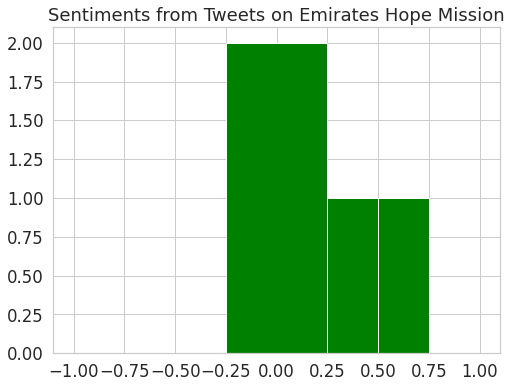

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on Emirates Hope Mission")
plt.show()

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

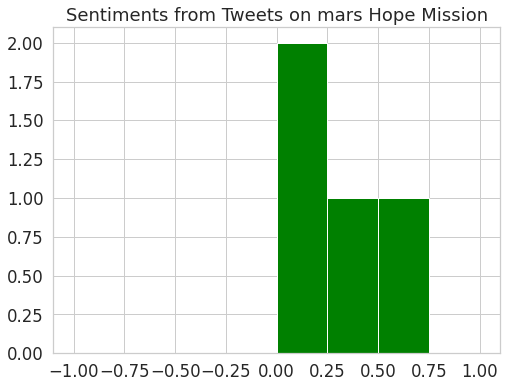

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on mars Hope Mission")
plt.show()

In [50]:
search_term = "#mars -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-07-19').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Skys the limit with OceanOutdoorUK Amazing live stream of NASAPersevere landing on Mars OOH Outdoor"),
 TextBlob("I want to congratulate NASA for such brilliant Mars coverage on YouTube Its educational its wonderful and you"),
 TextBlob("Nice cartoons Percy on Mars Space technologies planetology NASAPersevere will find support from"),
 TextBlob("fundNASA NASAPerseverance NASAWebb lets continue the explorations of mankind back to themoon Mars and beyond"),
 TextBlob("Alien on Earth Human on Mars Fiction Reality")]

In [51]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,0.368182,Skys the limit with OceanOutdoorUK Amazing liv...
1,0.537500,I want to congratulate NASA for such brilliant...
2,0.600000,Nice cartoons Percy on Mars Space technologies...
4,-0.125000,Alien on Earth Human on Mars Fiction Reality
10,0.250000,NASA Releases First Video and Audio of Rover L...


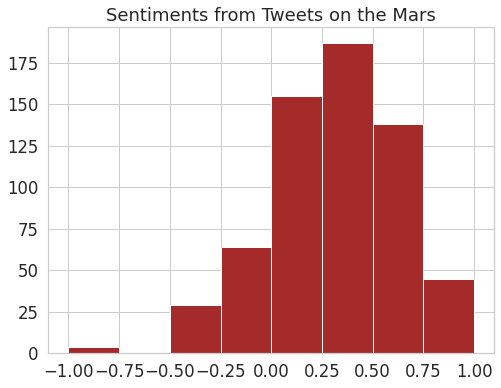

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="brown")

plt.title("Sentiments from Tweets on the Mars")
plt.show()

In [57]:
search_term = "#Tianwen-1 -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-07-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("3 different missions to Mars have arrived Amal Hope Perseverance and Tianwen1 Quest for Heavenly Truth"),
 TextBlob("There are 8 spacecraft orbiting Mars right now sent there by 6 different space agencies from around the world Chi"),
 TextBlob("Chinas Tianwen1 probe on Monday performed an orbital manoeuvre around Mars days after it successfully entered th"),
 TextBlob("PRCMarsRover Yesterday CCTV showed Tianwen1 rover model and president Xi together It shouldnt be that bad"),
 TextBlob("Not a lot of news about UAEs hope that reached the mars orbit last week and Chinas Tianwen1 entered the orbit Feb 10 MissionsToMars")]

In [58]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
1,0.142857,There are 8 spacecraft orbiting Mars right now...
2,0.750000,Chinas Tianwen1 probe on Monday performed an o...
3,-0.700000,PRCMarsRover Yesterday CCTV showed Tianwen1 ro...
6,0.250000,They dont even try simpler things first a la E...
7,0.750000,Incredible technological ability With the amaz...


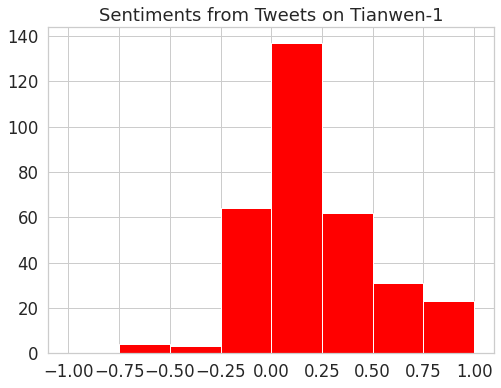

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="red")

plt.title("Sentiments from Tweets on Tianwen-1")
plt.show()

In [68]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("Claim UAE has reserved jobs for those born on 9 Feb the day when HOPE Probe arrived on the orbit of Mars"))

In [65]:
search_term = "#mars2020 -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='30 July 2020').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("360 degree view of Mars from the NASA Perseverance Rover PerseveranceRover is 9 foot six inches across 29 m"),
 TextBlob("So NASAPersevere landed on Mars surface at 2055 UTC yesterday It was under the Mars 2020 mission launched"),
 TextBlob("I never woke up feeling so ecstatic and relieved right now Launched on july 2020 and just landed earlier this mo"),
 TextBlob("MarsPerseverance left Earth on July 30 2020 and finally landed on Mars today What an amazing accomplishment Th"),
 TextBlob("CountdownToMarsMars2020 MarsLanding July 2020 Feb 2021")]

In [66]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
2,0.142857,I never woke up feeling so ecstatic and reliev...
3,0.200000,MarsPerseverance left Earth on July 30 2020 an...
9,-0.025000,Well after a long awaited journey since take o...
10,-0.187500,Just a little shoutout to Perseverance and its...
15,-0.250000,We are anxiously awaiting the landing of the P...


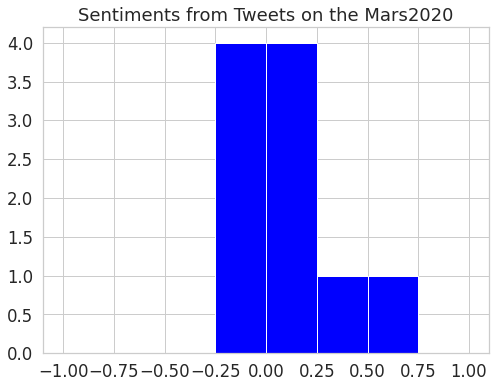

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="blue")

plt.title("Sentiments from Tweets on the Mars2020")
plt.show()

In [69]:
textBlob("I like mars")

NameError: ignored